`Wine Quality Prediction`

Key Concepts and Challenges:

- `Classifier Models`: Utilizing Random Forest, Stochastic Gradient Descent, and Support Vector Classifier (SVC) for wine quality prediction.
- `Chemical Qualities`: Analyzing features like density and acidity as predictors for wine quality.
- `Data Analysis Libraries`: Employing Pandas for data manipulation and Numpy for array operations.
- `Data Visualization`: Using Seaborn and Matplotlib for visualizing patterns and insights in the dataset.

In [9]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Read the dataset
df = pd.read_csv(r'WineQT.csv')

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


`Data Cleaning`

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [13]:
df.shape

(1143, 13)

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


`Exploratory Data Analysis`

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

<Axes: xlabel='quality', ylabel='fixed acidity'>

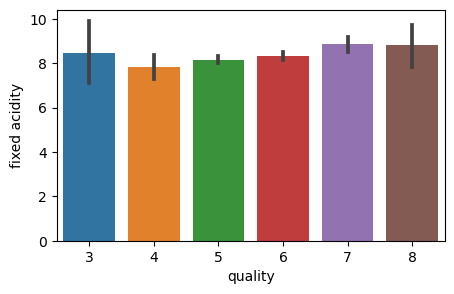

In [21]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

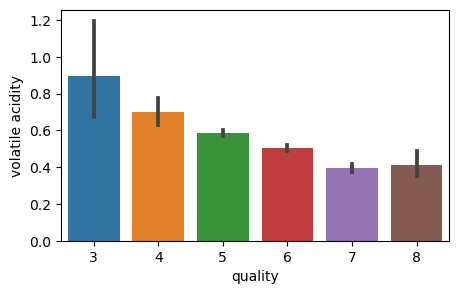

In [22]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

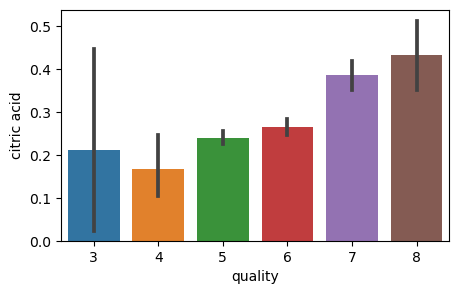

In [23]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

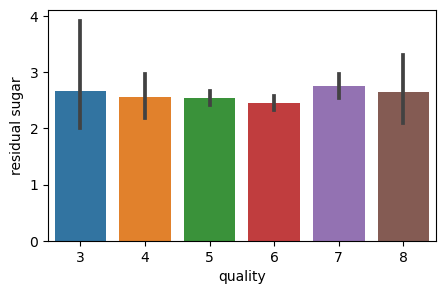

In [24]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

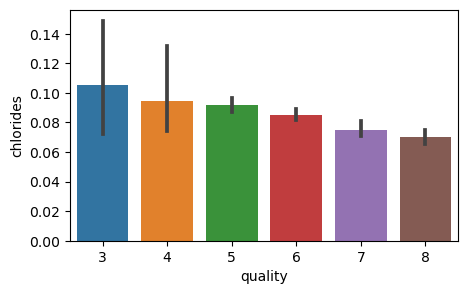

In [25]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

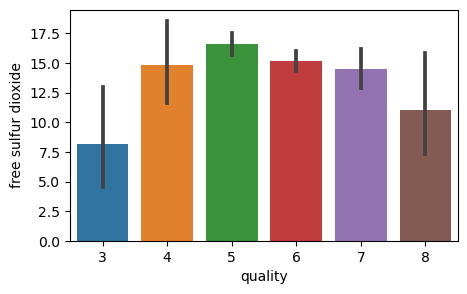

In [26]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

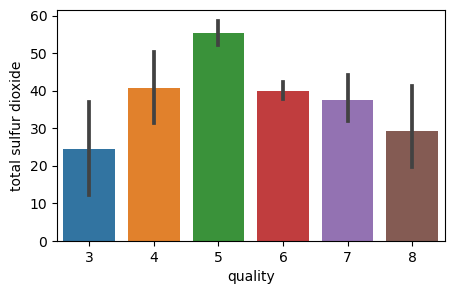

In [27]:
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

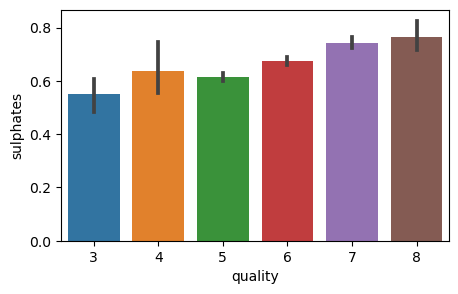

In [28]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

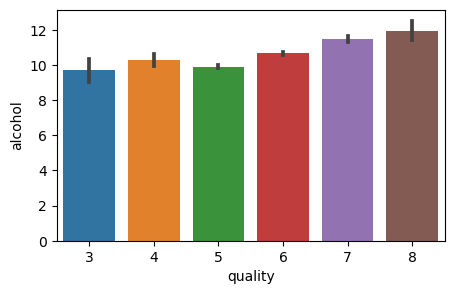

In [30]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (5,3))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [31]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

<Axes: ylabel='count'>

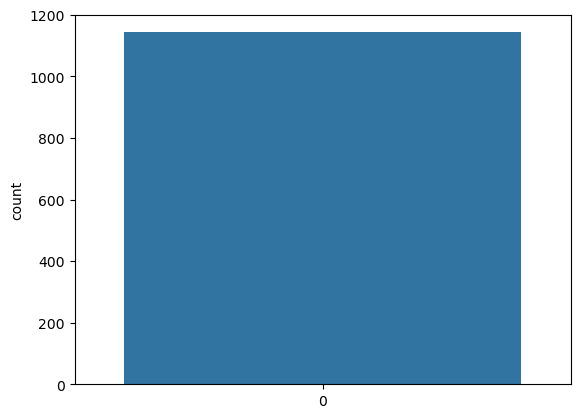

In [32]:
sns.countplot(df['quality'])

In [33]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [34]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

y_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_rfc)

In [37]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       201
           1       0.62      0.36      0.45        28

    accuracy                           0.90       229
   macro avg       0.77      0.66      0.70       229
weighted avg       0.88      0.90      0.88       229



In [38]:
print(confusion_matrix(y_test, pred_rfc))

[[195   6]
 [ 18  10]]


In [39]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

y_svc = svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_svc)

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       201
           1       0.64      0.25      0.36        28

    accuracy                           0.89       229
   macro avg       0.77      0.62      0.65       229
weighted avg       0.87      0.89      0.87       229



In [40]:
#Grid Search CV
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

#Best parameters for our svc model
grid_svc.best_params_
{'C': 1.2, 'gamma': 0.8, 'kernel': 'rbf'}

#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)

print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       201
           1       0.94      0.54      0.68        28

    accuracy                           0.94       229
   macro avg       0.94      0.77      0.82       229
weighted avg       0.94      0.94      0.93       229



In [41]:
#Analyzing Chemical Qualities
features = ["fixed acidity","volatile acidity","citric acid","chlorides","total sulfur dioxide","density","sulphates","alcohol","residual sugar","free sulfur dioxide","pH"] 
quality_potential = 'quality'


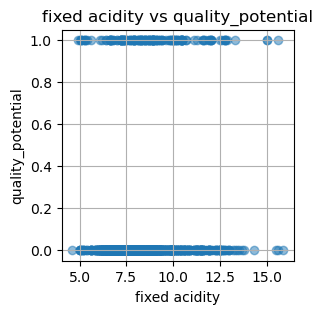

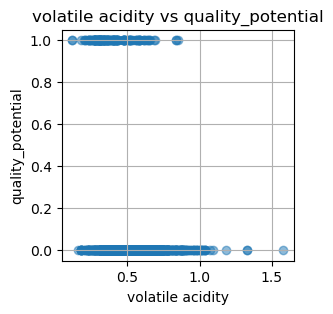

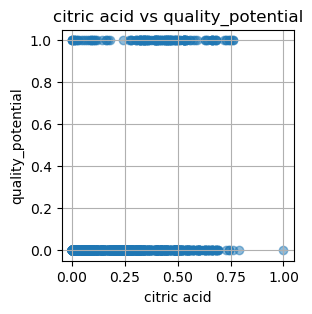

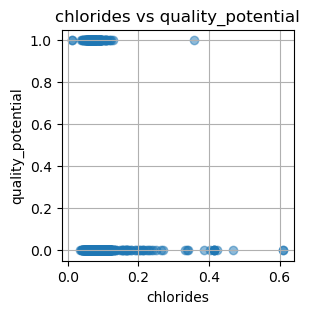

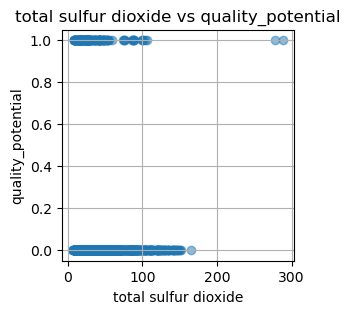

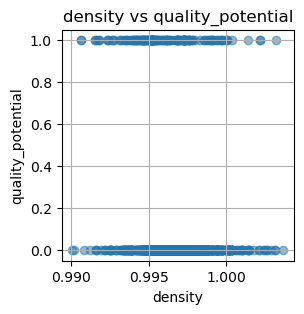

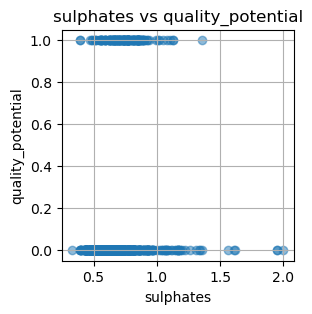

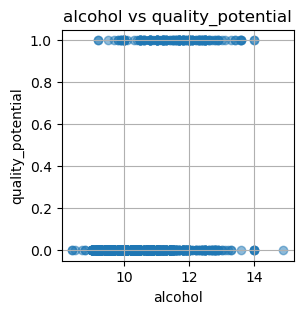

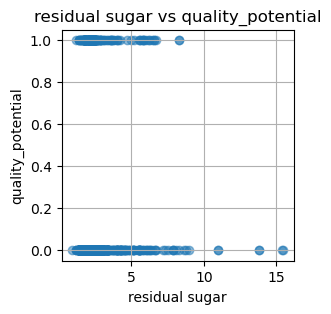

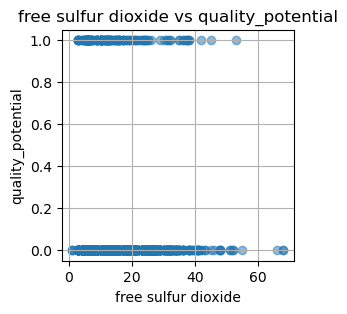

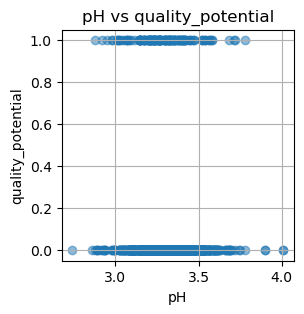

In [44]:
for feature in features:
    plt.figure(figsize=(3, 3))
    plt.scatter(df[feature], df[quality_potential], alpha=0.5)
    plt.title(f'{feature} vs quality_potential')
    plt.xlabel(feature)
    plt.ylabel('quality_potential')
    plt.grid(True)
    plt.show()

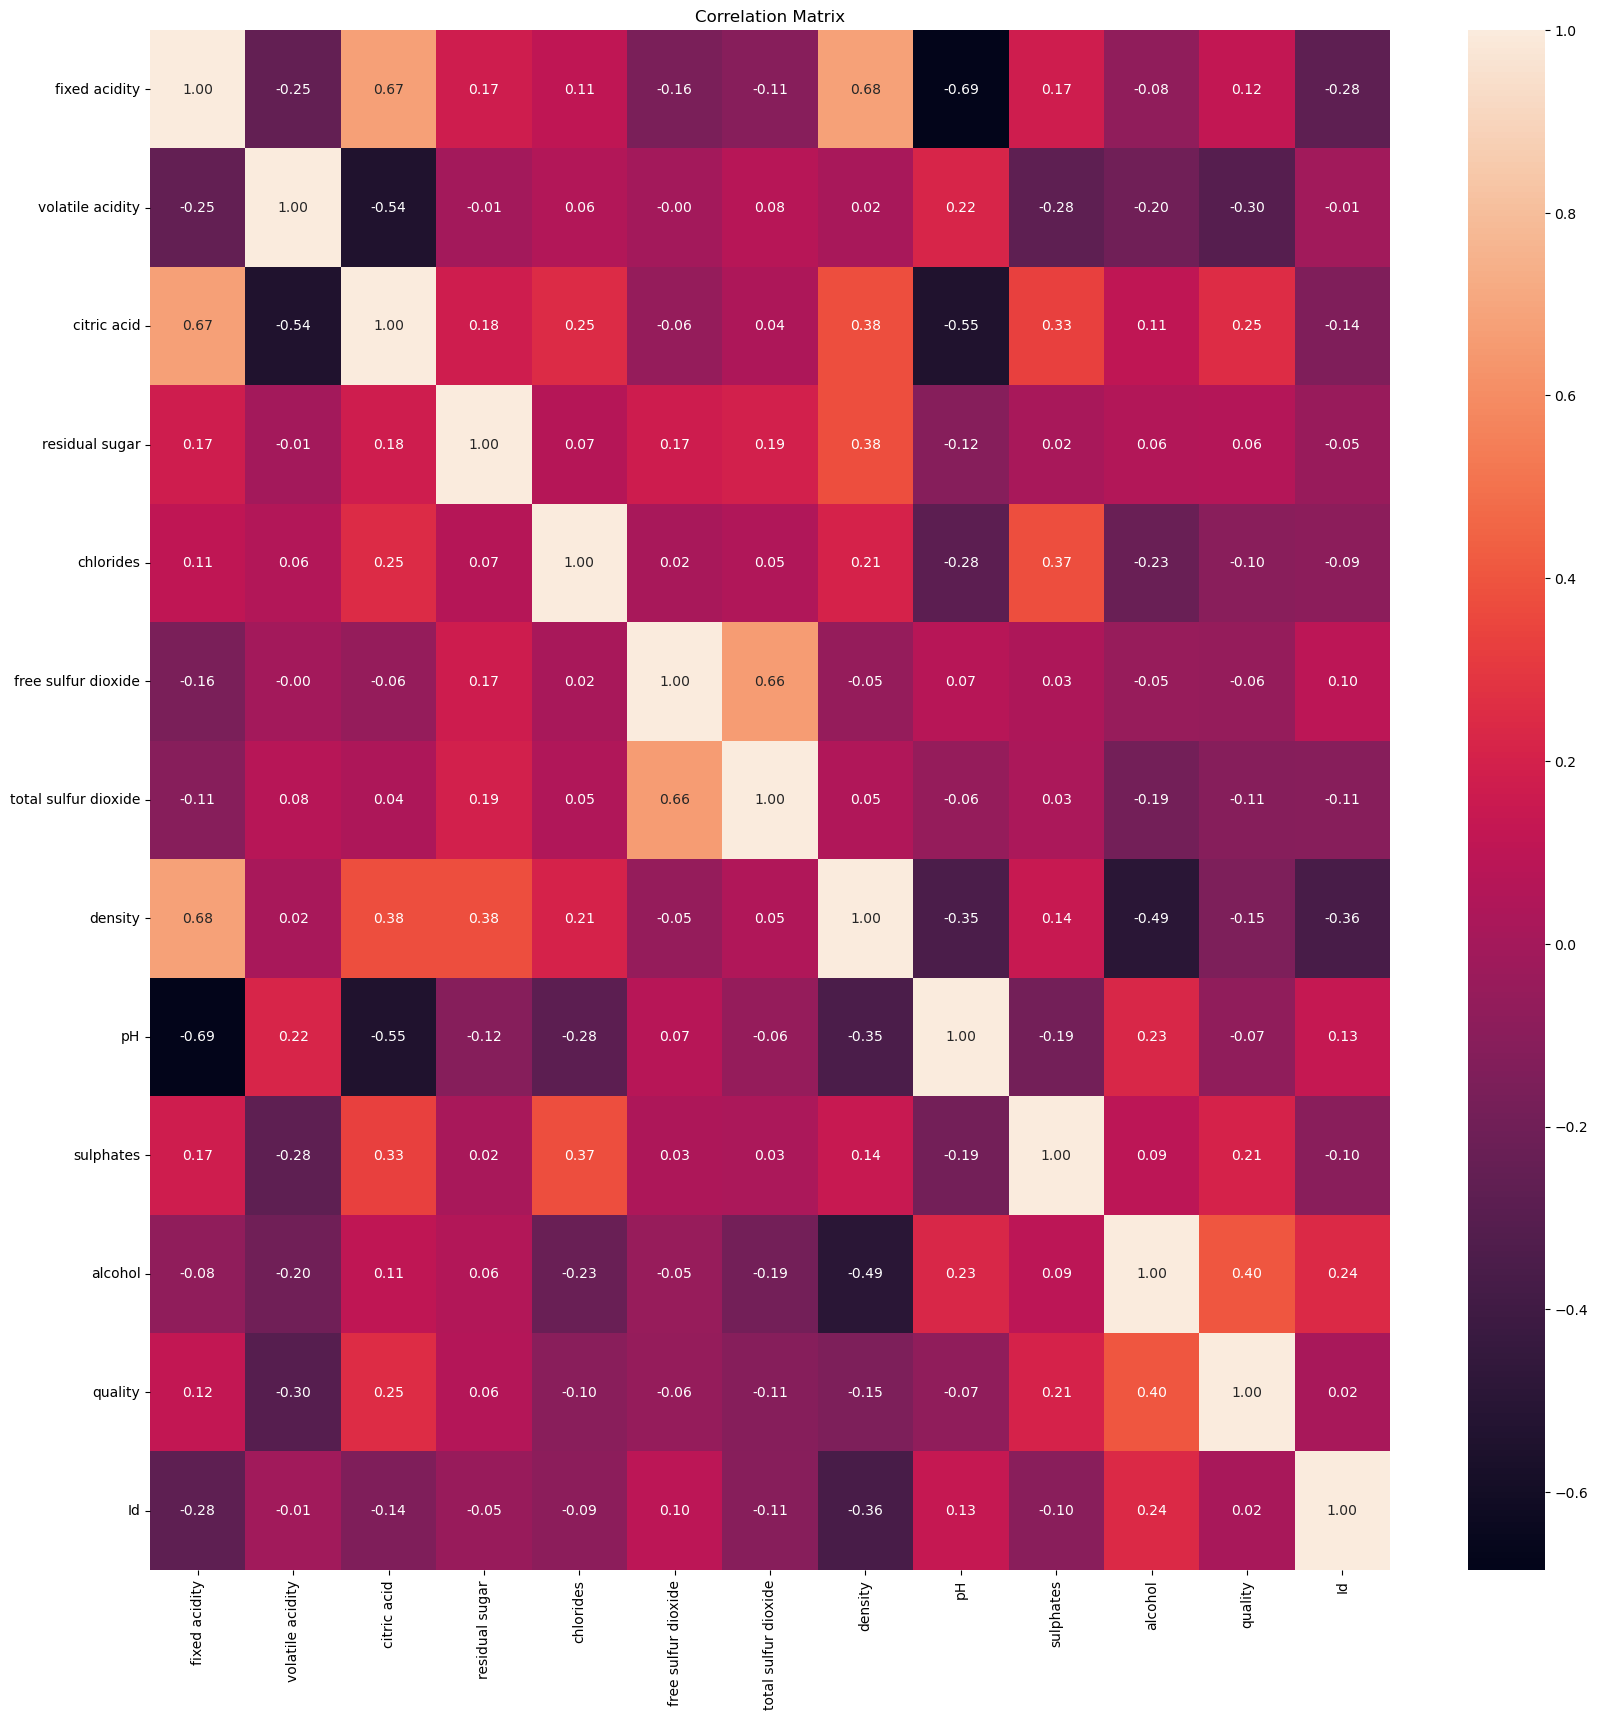

In [45]:
corr_mat = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [46]:
#Outlier treatment

def display_boxplots(dataset):
    for column in dataset.columns:
        plt.figure()
        plt.boxplot(dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

def drop_outliers_iqr(dataset, threshold=1):
    filtered_df = pd.DataFrame()
    for column in dataset.columns:
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        filtered_df[column] = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)][column]
    return filtered_df

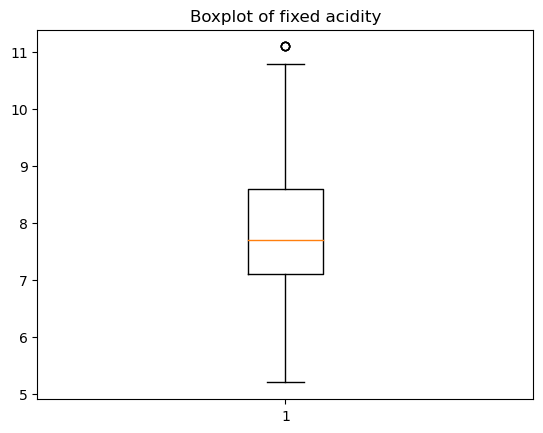

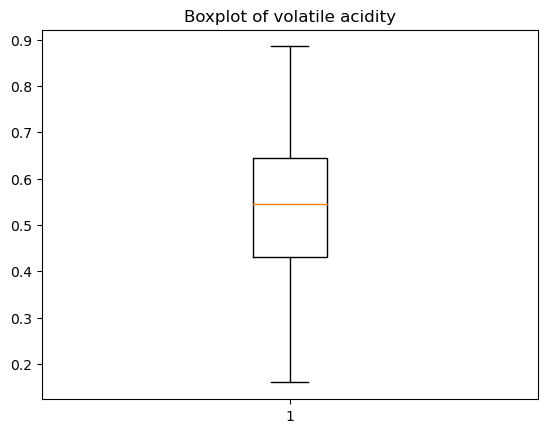

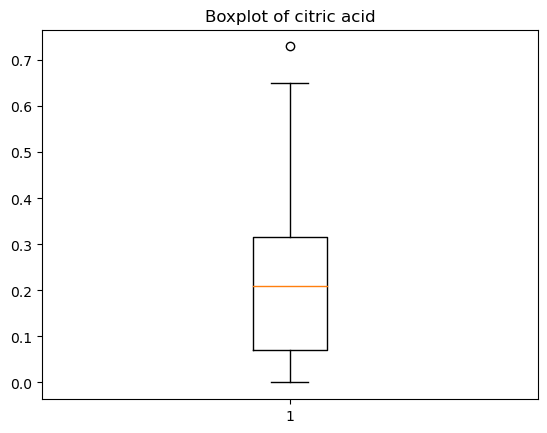

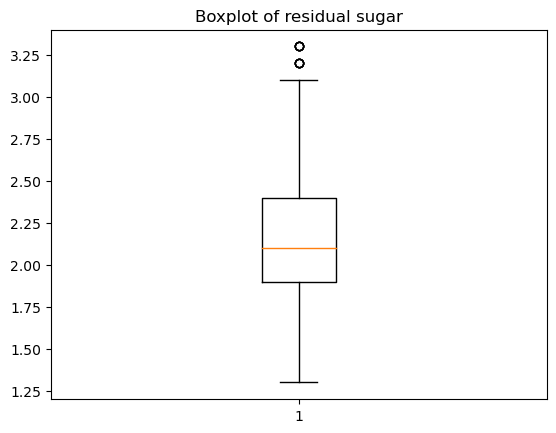

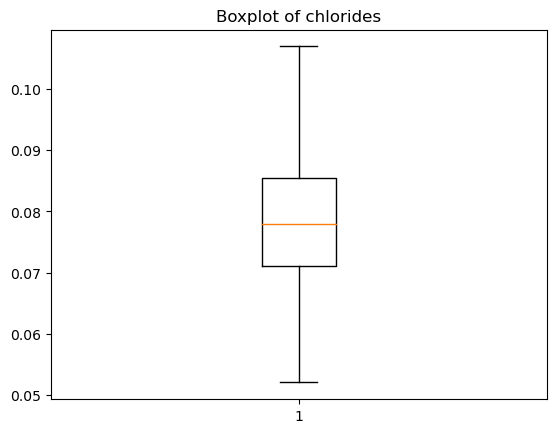

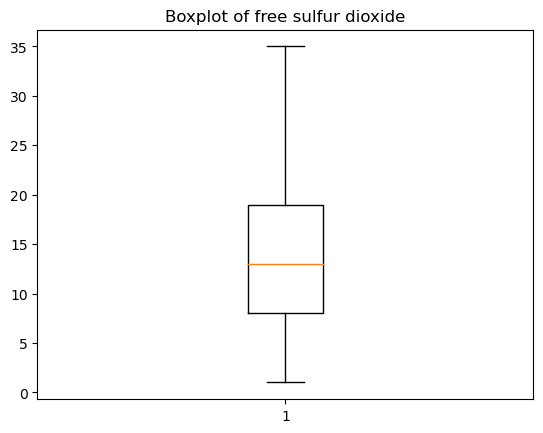

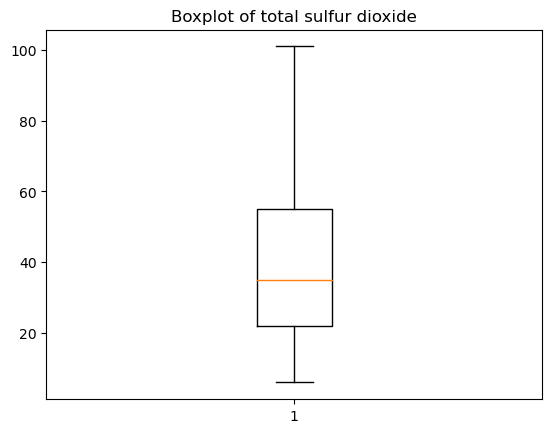

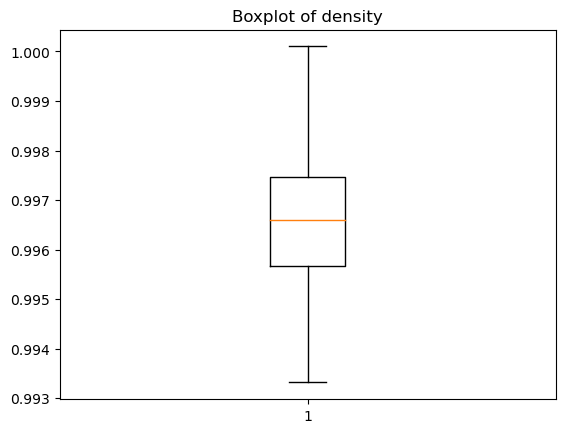

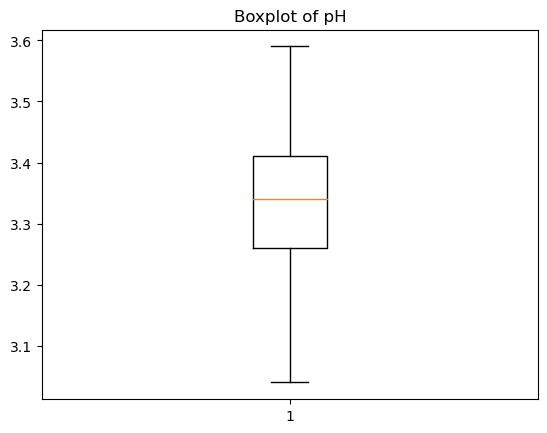

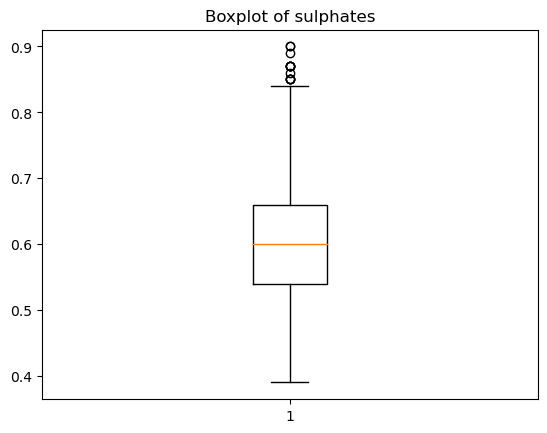

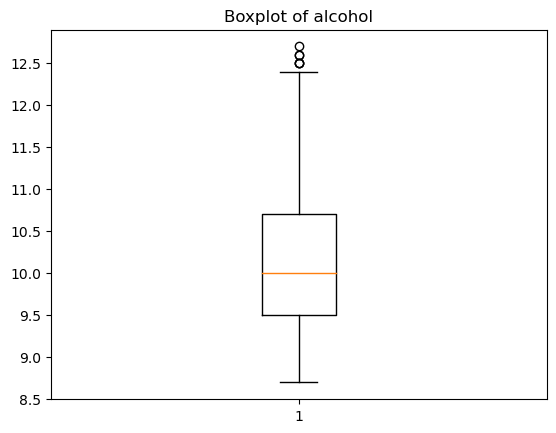

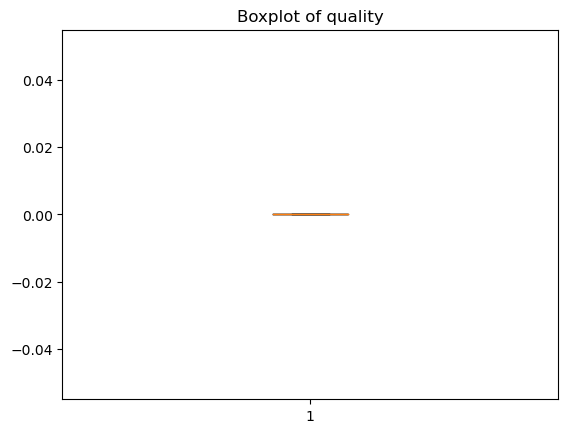

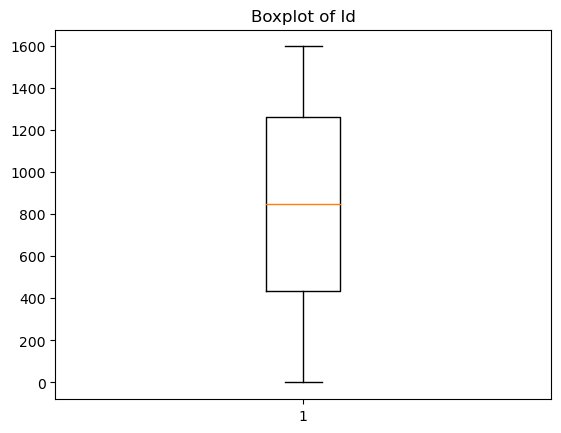

In [47]:
filtered_df = drop_outliers_iqr(df)
filtered_df = filtered_df.dropna()
display_boxplots(filtered_df)